In [1]:
import zipfile
import os
import glob
import random
from matplotlib import pyplot as plt

import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:


# # Path to your zip file
# zip_path = './../data/ninjacart_data.zip'

# # Directory to extract to
# extract_to = './../data/'

# # Unzip the file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)


## Plot Traning data

In [3]:
class_dir = os.listdir('./../data/ninjacart_data/train')
image_dict = dict()
count_dict = dict()

for cls in class_dir:
    path = glob.glob(f'./../data/ninjacart_data/train/{cls}/*')
        
    count_dict[cls] = len(path)
    
    random_img = random.sample(path, k=3)
    
    image_dict[cls] = [keras.utils.load_img(img) for img in random_img]
    

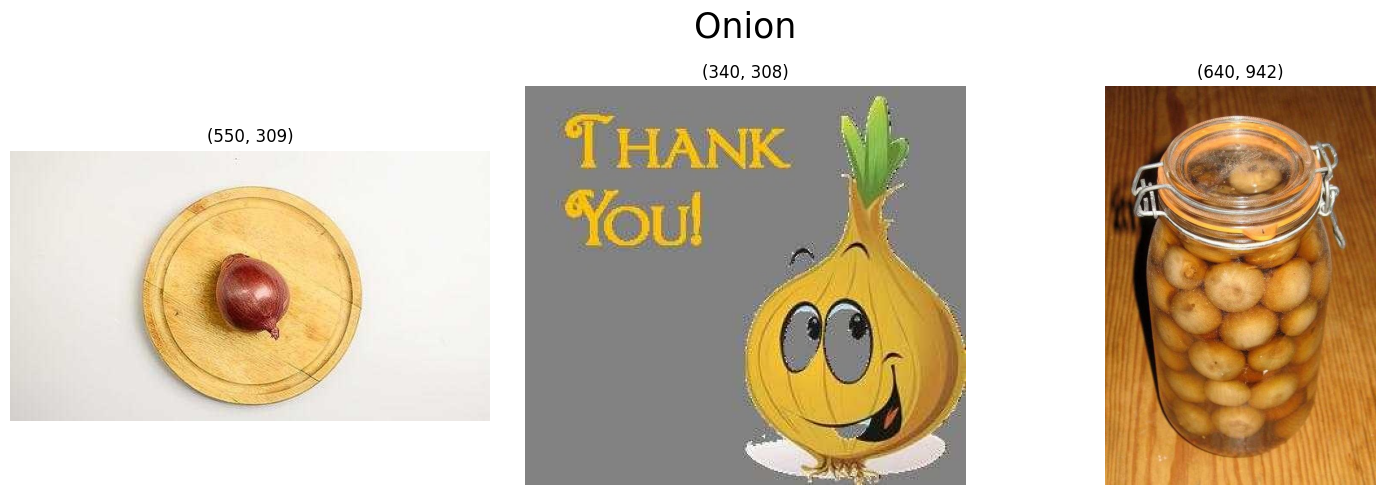

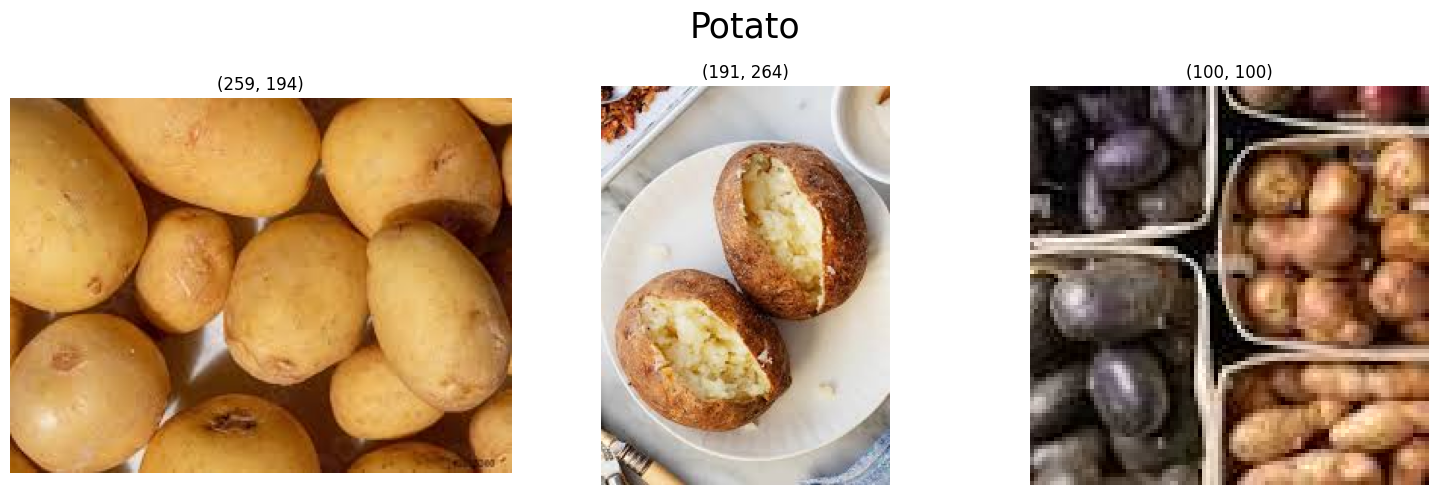

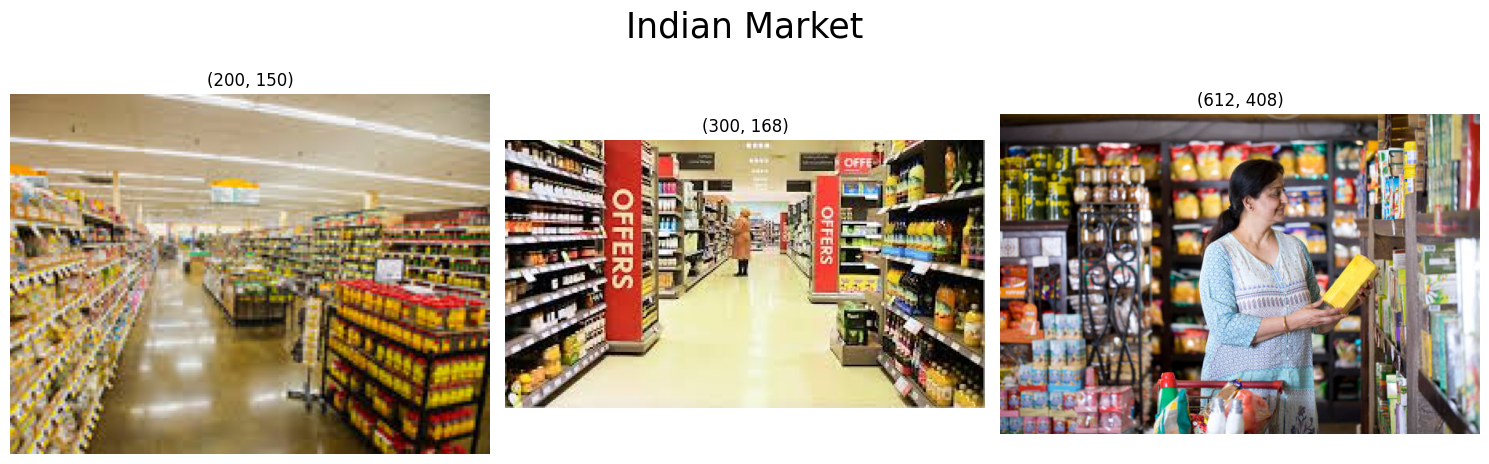

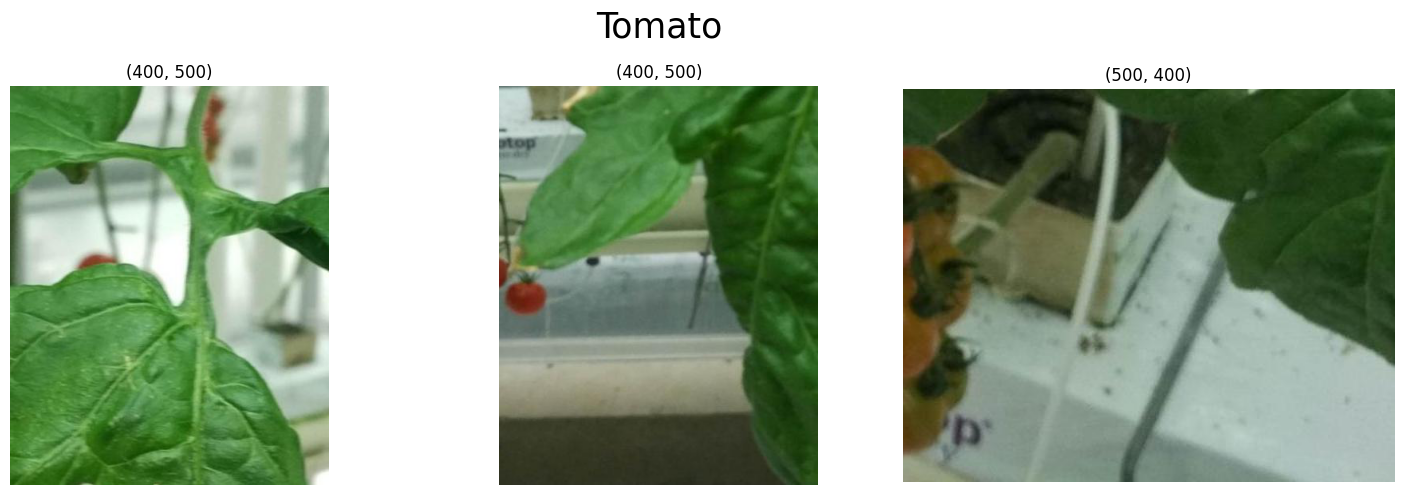

In [4]:
## Plot image

for cls, images in image_dict.items():
    plt.figure(figsize=(15, 5))
    
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(images[i])
        plt.title(images[i].size)
        plt.axis('off')
    
    plt.suptitle(cls.title(), fontsize=25)
    plt.tight_layout()
    plt.show()


In [5]:
## Check image count in train and test data set

for cls, count in count_dict.items():
    print(f'{cls.title()}: {count}')

Onion: 849
Potato: 898
Indian Market: 599
Tomato: 789


<Axes: title={'center': 'Training data count per class'}, xlabel='class'>

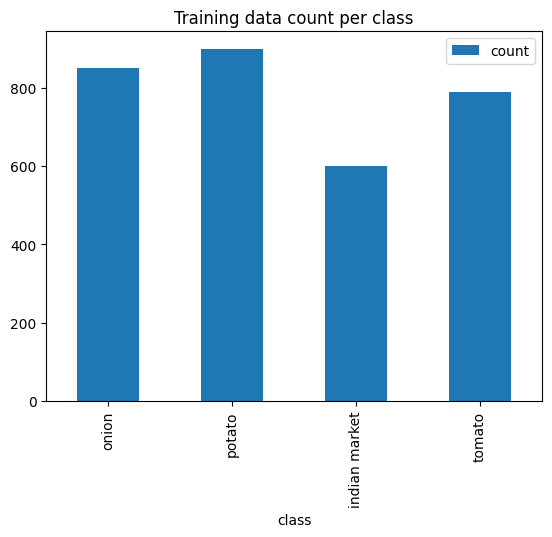

In [6]:
df = pd.DataFrame({
    'class': count_dict.keys(),
    'count': count_dict.values()
})

df.plot.bar(x='class', y='count', title='Training data count per class')

## Plot testing data

In [7]:
class_dir = os.listdir('./../data/ninjacart_data/test')
image_dict = dict()
count_dict = dict()

for cls in class_dir:
    path = glob.glob(f'./../data/ninjacart_data/test/{cls}/*')
        
    count_dict[cls] = len(path)
    
    random_img = random.sample(path, k=3)
    
    image_dict[cls] = [keras.utils.load_img(img) for img in random_img]
    

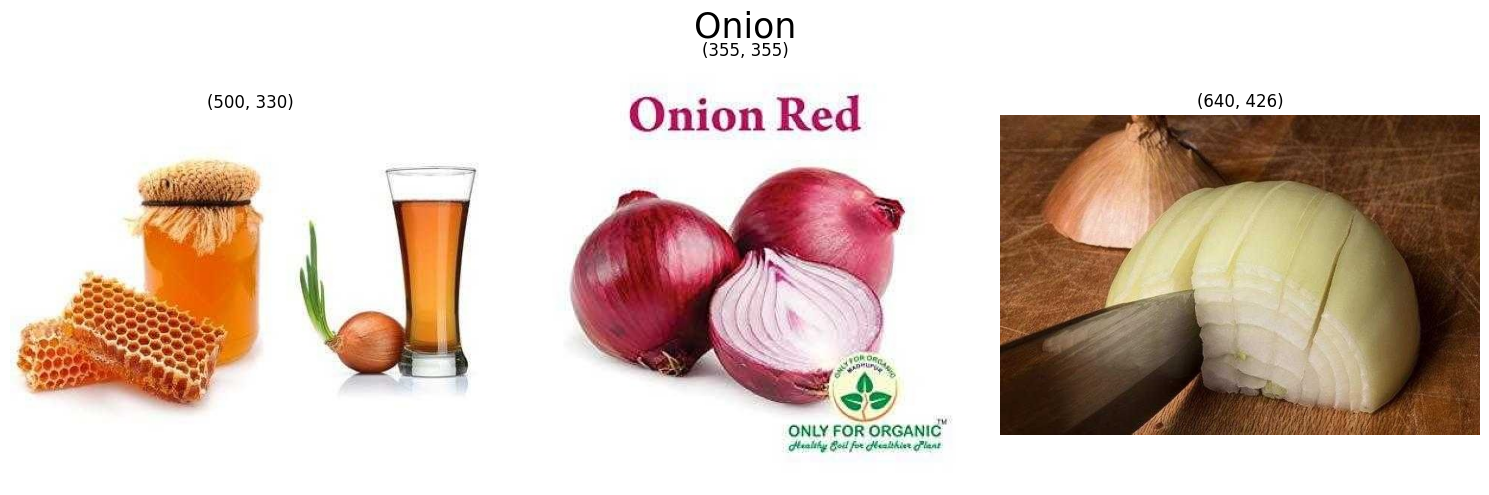

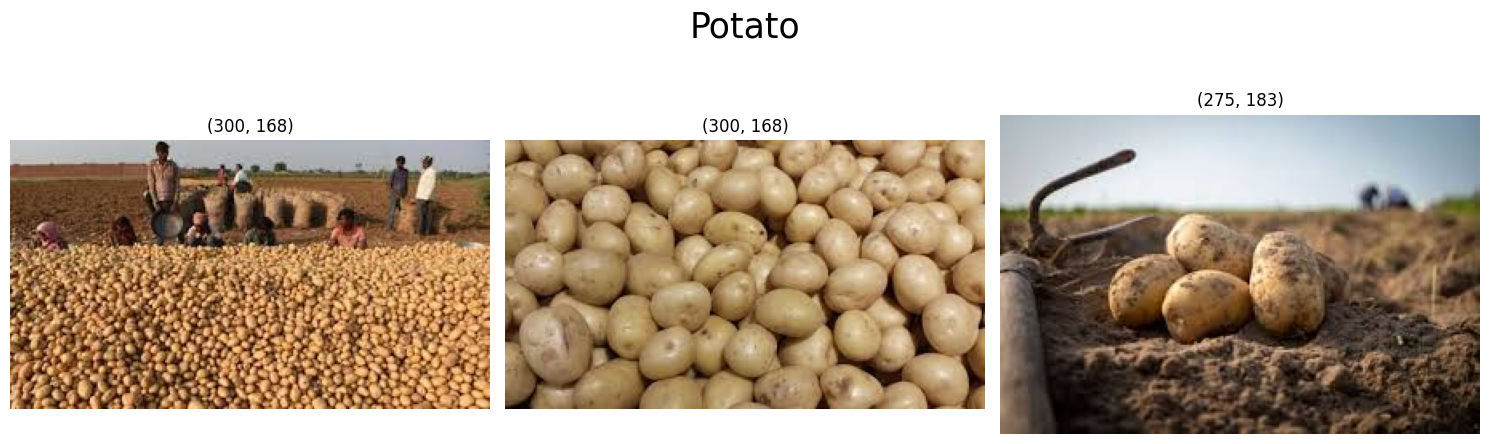

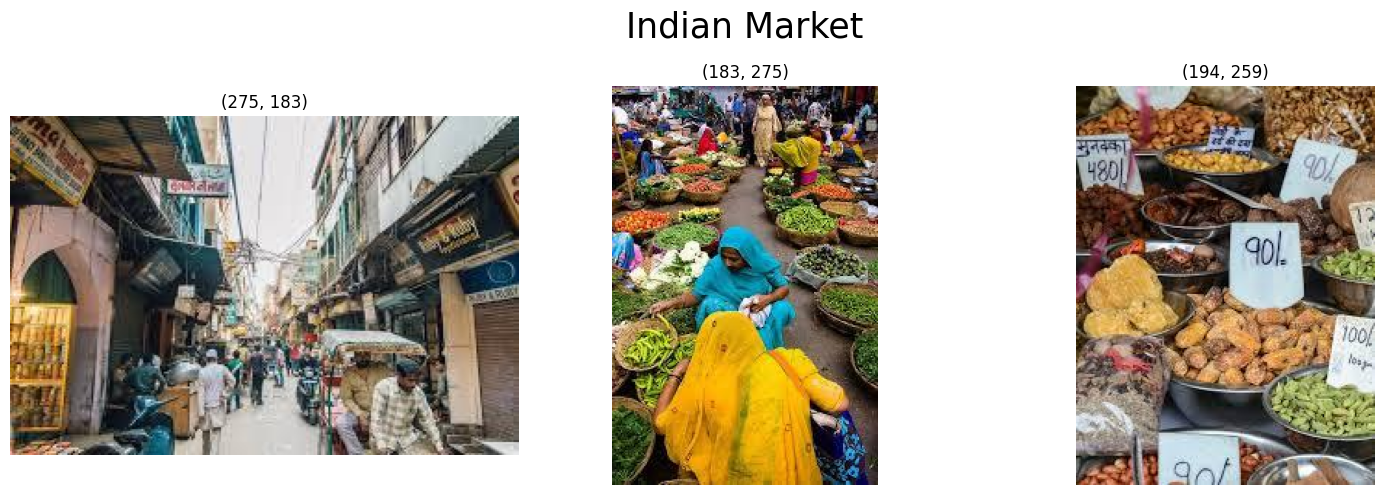

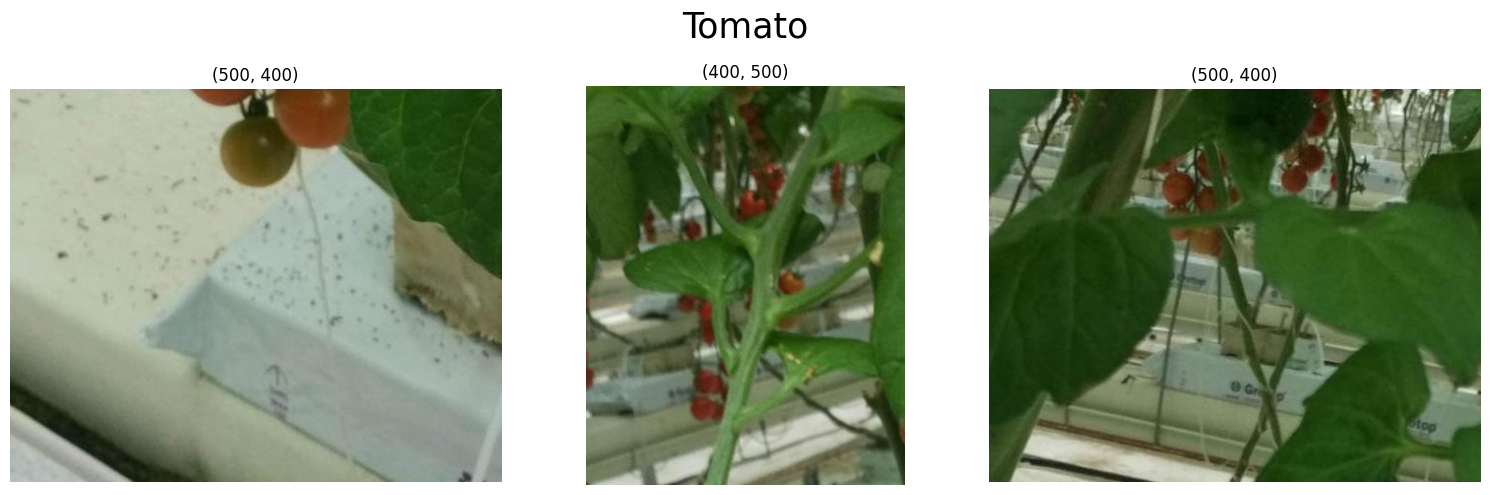

In [8]:
## Plot image

for cls, images in image_dict.items():
    plt.figure(figsize=(15, 5))
    
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(images[i])
        plt.title(images[i].size)
        plt.axis('off')
    
    plt.suptitle(cls.title(), fontsize=25)
    plt.tight_layout()
    plt.show()


In [9]:
## Check image count in train and test data set

for cls, count in count_dict.items():
    print(f'{cls.title()}: {count}')

Onion: 83
Potato: 81
Indian Market: 81
Tomato: 106


<Axes: title={'center': 'Training data count per class'}, xlabel='class'>

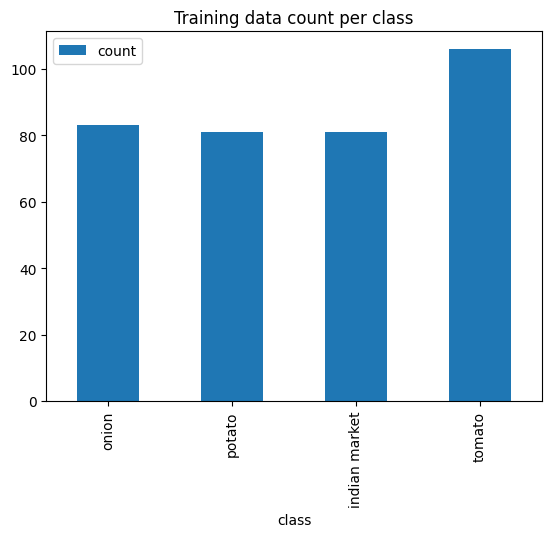

In [10]:
df = pd.DataFrame({
    'class': count_dict.keys(),
    'count': count_dict.values()
})

df.plot.bar(x='class', y='count', title='Training data count per class')

## Train validation split

In [11]:
# Split into training and validation data set

train_ds = keras.utils.image_dataset_from_directory(
    './../data/ninjacart_data/train',
    validation_split=0.2,
    seed=123,
    subset='training',
    image_size=(224, 224),
    batch_size=32
)

val_ds = keras.utils.image_dataset_from_directory(
    './../data/ninjacart_data/train',
    validation_split=0.2,
    seed=123,
    subset='validation',
    image_size=(224, 224),
    batch_size=32
)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.


2025-07-17 22:54:57.671801: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-07-17 22:54:57.671847: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-07-17 22:54:57.671856: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2025-07-17 22:54:57.671901: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-17 22:54:57.671914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 3135 files belonging to 4 classes.
Using 627 files for validation.


In [12]:
# scale image

train_ds = train_ds.map(lambda x, y: (keras.layers.Rescaling(1./255)(x), y))

val_ds = val_ds.map(lambda x, y: (keras.layers.Rescaling(1./255)(x), y))